In [44]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('BUD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/22/2015,126.730003,127.959999,126.720001,127.470001,109.314354,854400
1,7/23/2015,127.129997,127.139999,125.519997,125.800003,107.882210,1412600
2,7/24/2015,125.870003,126.040001,124.269997,124.389999,106.673027,1116100
3,7/27/2015,123.690002,123.919998,122.800003,123.339996,105.772583,1400700
4,7/28/2015,123.529999,124.230003,122.900002,123.800003,106.167076,983400


In [46]:
data1 = data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
data1.head()

,Date,Close
0,7/22/2015,127.470001
1,7/23/2015,125.800003
2,7/24/2015,124.389999
3,7/27/2015,123.339996
4,7/28/2015,123.800003


ValueError: Error parsing datetime string "7/22/2015" at position 1

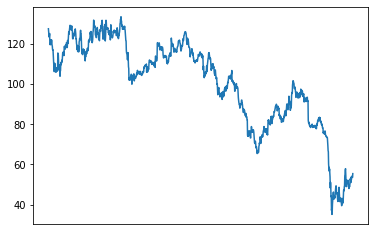

In [53]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
months = mdates.MonthLocator()

fig, ax = plt.subplots()
ax.plot('Date', "Close", data=data)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['Date'][0], 'Y')
datemax = np.datetime64(data['Date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x
ax.grid(True)

fig.autofmt_xdate()

plt.show()

Text(0.5, 1.0, 'BUD (Anheuser-Busch) Stock History')

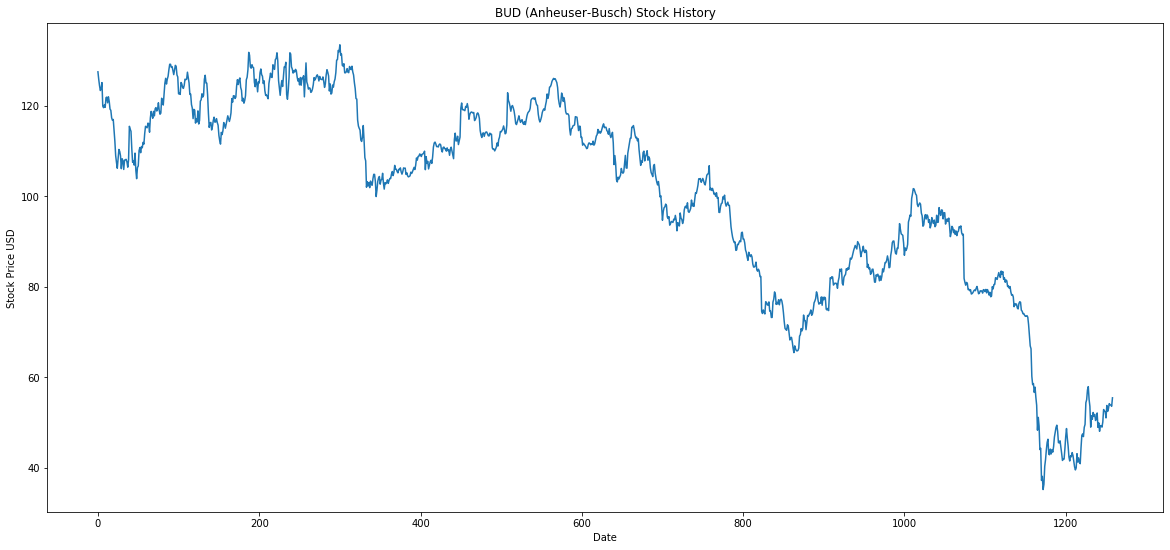

In [58]:
data1["Date"]=pd.to_datetime(data1.Date,format="%m/%d/%Y")
plt.figure(figsize=(20,9))
plt.plot(data1["Close"])
plt.ylabel('Stock Price USD')
plt.xlabel('Date')
plt.title('BUD (Anheuser-Busch) Stock History')